In [1]:
import numpy as np
import matplotlib.pyplot as plt

from MoG import MoG

In [2]:
def generate_2D_clusters(k = 3, points_per_cluster = 200, domain = [-5,5]):
    """
    Generate a mixture of 2D Gaussians

    Inputs:
        - k : number of clusters
        - points_per_cluster : number of points per cluster
        - domain : the domain of the clusters

    Outputs:
        - X : the generated points
    """

    # generate random means
    means = np.random.rand(k, 2) * (domain[1] - domain[0]) + domain[0]

    # generate random covariance matrices
    covariances = []
    for i in range(k):
        cov = np.random.rand(2, 2)
        cov = np.dot(cov, cov.T)
        covariances.append(cov)

    # generate points
    X = []
    for i in range(k):
        points = np.random.multivariate_normal(means[i], covariances[i], points_per_cluster)
        X.append(points)

    return np.vstack(X)

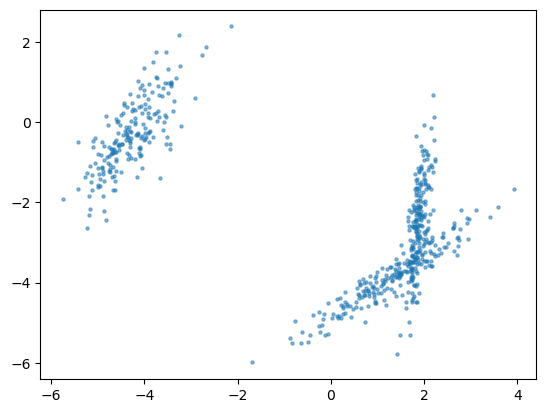

In [16]:
k = 3
domain = [-5,5]

X = generate_2D_clusters(k, points_per_cluster = 200, domain = domain)

plt.scatter(X[:,0], X[:,1], s=5, alpha=0.5)
plt.show()

## EM algorithm

In [20]:
# ------------------------------------------
# Parameters for the EM algorithm
iterations = 20
plotting = False
create_gif = True   # needs pillow package
# ------------------------------------------

gaussian_mixture = MoG(k = k, domain = domain)
gaussian_mixture.init_EM_algorithm(X)
log_likelihoods = [gaussian_mixture.log_likelihood()]


for _ in range(iterations):

    # E-step
    gaussian_mixture.E_step()

    # M-step
    gaussian_mixture.M_step()

    # log-likelihood
    log_likelihoods.append(gaussian_mixture.log_likelihood())

    if gaussian_mixture.iteration % 5 == 0:
        print(f"Iteration {gaussian_mixture.iteration}: log-likelihood = {log_likelihoods[-1]:.2f}")

    gaussian_mixture.plot_MoG(plotting = plotting, n_std = 2)

if create_gif:
    from utils import create_gif
    create_gif(duration = 500)

Iteration 5: log-likelihood = -1388.88
Iteration 10: log-likelihood = -1357.86
Iteration 15: log-likelihood = -1357.85
Iteration 20: log-likelihood = -1357.85
Found 20 frames:
Saved GIF to gaussian_mixture.gif


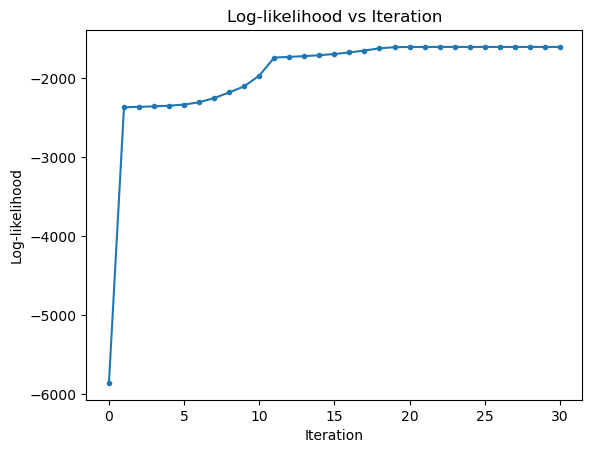

In [7]:
plt.plot(log_likelihoods, marker='.')
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood vs Iteration")
plt.show()